## Introduction

This notebook is for illustrating the examples we used in our paper, for demonstrating the correctness of our math deduction.  

In [10]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(suppress=True)
np.set_printoptions(precision=5)
# np.random.seed(3)

Note that we define a function for creating a simulated O/E matrix and transform it into the Pearson matrix.   

In [11]:
def generate_oe_matrix(length:int, variance_threshold_L:int = 0.85, variance_threshold_U:int = 1):
    """
        Generates a random 5x5 symmetric matrix with positive values and
        the first PC explaining at least L% and at most U% of the variance.
    """

    while True:
        # Create a nxn array with random positive values
        matrix = np.abs(np.random.randn(length, length) * 10)  # Use absolute values for positive entries
        # Make the array symmetric
        matrix = matrix + matrix.T
        origin_matrix = matrix.copy()

        # Subtract the mean of each row to center the data (For PCA)
        matrix = matrix - matrix.mean(axis=1, keepdims=True)

        # SVD 
        n = len(matrix[0])
        y = matrix.T / np.sqrt(n)
        U, S, Vh = np.linalg.svd(y, full_matrices=True)
        eigenvalues = S * S
        EV1_explained_variance = eigenvalues[0] / np.sum(eigenvalues) 

        # Check if the first PC explains at least the desired variance
        if EV1_explained_variance >= variance_threshold_L and EV1_explained_variance < variance_threshold_U:
            return origin_matrix

length = 5
# Generate a simulated O/E matrix.
oe = generate_oe_matrix(length=length)
# Calculate the Pearson matrix.
X = np.corrcoef(oe)
# Subtract the mean of each row to center the data
X = X - X.mean(axis=1, keepdims=True)

#### Perform PCA on the Pearson correlation matrix <br>

In [12]:
n = length
y = X.T / np.sqrt(n)

U, S, Vh = np.linalg.svd(y, full_matrices=True)
eigenvalues = S * S
explained_variance_ratios = eigenvalues / np.sum(eigenvalues)
cov_x = np.matmul(y.T, y)
V_Cx = np.matmul(Vh, cov_x)

print('explained variances (lambda)')
print(eigenvalues, '\n')
print('explained variance ratios')
print(explained_variance_ratios, '\n')
print("X")
print(X, '\n')
print("Cx")
print(cov_x, '\n')
print("V")
print(V_Cx, '\n')
print("P transpose")
print(Vh.T, '\n')

explained variances (lambda)
[3.1924  0.05985 0.00096 0.00003 0.     ] 

explained variance ratios
[0.9813  0.0184  0.00029 0.00001 0.     ] 

X
[[ 0.73462 -0.99334  0.67545 -0.9319   0.51518]
 [-0.66843  1.05953 -0.48318  1.02055 -0.92846]
 [ 0.62034 -0.86321  0.6795  -0.75599  0.31936]
 [-0.65503  0.97251 -0.42401  1.01148 -0.90495]
 [ 0.67736 -1.09119  0.53666 -1.01964  0.8968 ]] 

Cx
[[ 0.6233  -0.65985  0.52824 -0.62849  0.67124]
 [-0.65985  0.74129 -0.54512  0.70912 -0.74829]
 [ 0.52824 -0.54512  0.45304 -0.51752  0.5568 ]
 [-0.62849  0.70912 -0.51752  0.67933 -0.71507]
 [ 0.67124 -0.74829  0.5568  -0.71507  0.75628]] 

V
[[-1.39561  1.53116 -1.16518  1.46217 -1.55037]
 [-0.02788 -0.02025 -0.04072 -0.02354  0.0135 ]
 [ 0.00041  0.00022 -0.00023 -0.00059 -0.00054]
 [-0.00002  0.00001  0.00002 -0.00002 -0.     ]
 [-0.       0.      -0.      -0.       0.     ]] 

P transpose
[[-0.43717 -0.46591  0.43049 -0.6141  -0.1714 ]
 [ 0.47963 -0.33829  0.22658  0.27679 -0.72634]
 [-0.36498 -0

In [13]:
print('V_Cx[0]')
print(V_Cx[0], '\n')
print('Vh[0]')
print(Vh[0], '\n')

V_Cx[0]
[-1.39561  1.53116 -1.16518  1.46217 -1.55037] 

Vh[0]
[-0.43717  0.47963 -0.36498  0.45802 -0.48564] 



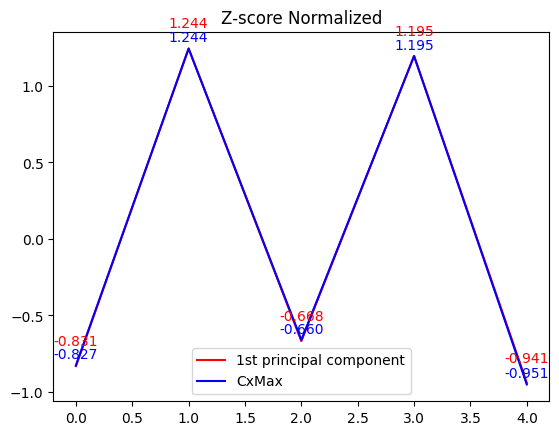

In [14]:
cov_x_sum = [np.sum(np.abs(row)) for row in cov_x]
cov_x_sum = list(enumerate(cov_x_sum)) 
sorted_list = sorted(cov_x_sum, key=lambda x: x[1], reverse=True) 
cov_x_selected = cov_x[sorted_list[0][0]]

if np.corrcoef(cov_x_selected, Vh[0])[0][1] < 0:
    cov_x_selected = -cov_x_selected

Vh0_Norm = (Vh[0] - np.mean(Vh[0])) / np.std(Vh[0])
cov_x_selected_Norm = (cov_x_selected - np.mean(cov_x_selected)) / np.std(cov_x_selected)

plt.plot(Vh0_Norm, c="red")
plt.plot(cov_x_selected_Norm, c="blue")

plt.title("Z-score Normalized")
plt.legend(["1st principal component", "CxMax"])

# zip joins x and y coordinates in pairs
# https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
Vh0_Norm_xs = np.arange(0, length, 1)
for x, y in zip(Vh0_Norm_xs, Vh0_Norm):
    label = "{:.3f}".format(y)
    plt.annotate(
        label, # this is the text
        (x, y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0, 15), # distance from text to points (x,y)
        ha='center', # horizontal alignment can be left, right or center
        color='red'
    ) 

cov_x_selected_Norm_xs = np.arange(0, length, 1)
for x, y in zip(cov_x_selected_Norm_xs, cov_x_selected_Norm):
    label = "{:.3f}".format(y)
    plt.annotate(
        label, # this is the text
        (x, y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0, 5), # distance from text to points (x,y)
        ha='center', # horizontal alignment can be left, right or center
        color='blue'
    ) 

In [15]:
plt.close('all')

### Check the plot without Normalization on the Pearson correlation matrix

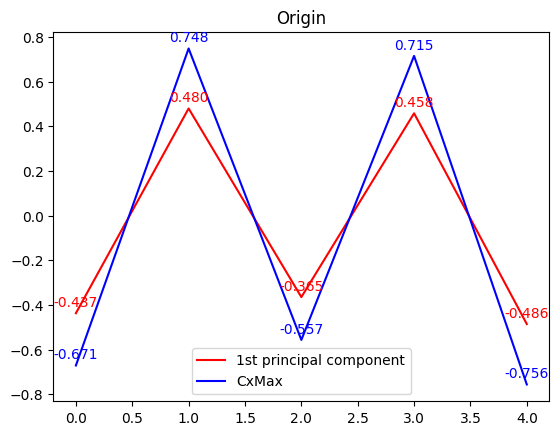

In [16]:
plt.plot(Vh[0], c="red")
plt.plot(cov_x_selected, c="blue")

plt.title("Origin")
plt.legend(["1st principal component", "CxMax"])

# zip joins x and y coordinates in pairs
# https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
Vh0_xs = np.arange(0, length, 1)
for x, y in zip(Vh0_xs, Vh[0]):
    label = "{:.3f}".format(y)
    plt.annotate(
        label, # this is the text
        (x, y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0, 5), # distance from text to points (x,y)
        ha='center', # horizontal alignment can be left, right or center
        color='red'
    ) 

cov_x_selected_xs = np.arange(0, length, 1)
for x, y in zip(cov_x_selected_xs, cov_x_selected):
    label = "{:.3f}".format(y)
    plt.annotate(
        label, # this is the text
        (x, y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0, 5), # distance from text to points (x,y)
        ha='center', # horizontal alignment can be left, right or center
        color='blue'
    ) 

In [17]:
print("The first row of V")
print(V_Cx[0], '\n')
print("Corresponding entry of V:")
print(np.dot(Vh[0], cov_x_selected))

The first row of V
[-1.39561  1.53116 -1.16518  1.46217 -1.55037] 

Corresponding entry of V:
1.5503679519474234


In [18]:
plt.close('all')